## @Sitabja Pal, 08/10/18
## Multivariant Linear Regression By Ordinary Least Square Method

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [125]:
data=pd.read_csv('50_Startups.csv')
data.head()
#data.describe

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Preperation of Dependant and Independant variable matrix

In [126]:
x=data.iloc[:,:-1].values
y=data.iloc[:,4].values

### Encoding Catagorical Data 'State' & Train_Test Split

In [127]:
labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
hotencoder=OneHotEncoder(categorical_features=[3])
x=hotencoder.fit_transform(x).toarray()
x=x[:,1:]
x=np.append(np.ones((len(x[:,1]),1)),x,axis=1) # Add one extra column of 1's infront of the data_set
#x.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0) # train test split
#x_test

### Ordinary Least Square Implementation:
 #### β=(X′X).inverse X′Y
 [Click to Watch the algorithm](https://www.youtube.com/watch?v=dkfY0OKH12g)

In [132]:
def ordinaryLeastSquare(x_train,y_train):
    X_transposeX=np.dot((x_train.T),x_train)
    X_transposex_inv=np.linalg.inv(X_transposeX)
    X_transpose_y=np.dot((x_train.T),y_train)
    b=np.dot(X_transposex_inv,X_transpose_y)
    return b

beta=ordinaryLeastSquare(x_train,y_train)

### Function to get the prediction of the given test set
#### y_predict=(x_test * β')

In [129]:
def predict(x_test,beta):
    y_pred=np.dot(x_test,beta.T)
    return y_pred

In [130]:
y_pred=predict(x_test,beta)
#print(y_test,y_pred,sep='\n')

Text(0,0.5,'Profit')

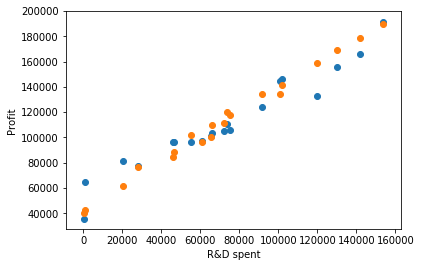

In [131]:
plt.scatter(x_test[:,3],y_test)
plt.scatter(x_test[:,3],y_pred)
plt.xlabel("R&D spent")
plt.ylabel("Profit")